In [3]:
__nbid__ = '0032'
__author__ = 'Alice Jacques <alice.jacques@noirlab.edu>','David Herrera <david.herrera@noirlab.edu>',
__version__ = '20251205' # yyyymmdd
__datasets__ = ['gaia_dr3']
__keywords__ = ['science example', 'stars', 'parallax', 'vospace']

# Usando Gaia DR3 para identificar candidatas a enanas blancas hiperrápidas e hiperveloces

#### (_Traducción de [HypervelocityWhiteDwarfCandidatesInGaiaDR3.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/WhiteDwarfs/HypervelocityWhiteDwarfCandidatesInGaiaDR3.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#imports)
* [Autenticación](#auth)
* [Consulta a Gaia DR3 parte I: para candidatas a WD HVS](#query)
* [Consulta a Gaia DR3 parte II: para objetos dentro de 100 pc](#query100pc)
* [Diagrama HR para candidatas a WDs y sdBs](#hr)
* [Distancias galactocéntricas y alturas sobre/debajo del plano galáctico para candidatas a WD HVS](#galacto)
* [Alturas sobre/debajo del plano galáctico de las candidatas a WD HVS observadas](#heights)
* [Recursos y referencias](#ref)

<a class="anchor" id="goals"></a>
# Objetivos
Reproducir las Figuras 1, 3 y 4 de [Igoshev et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.518.6223I/abstract) *"Hyper-runaway and hypervelocity white dwarf candidates in Gaia Data Release 3: possible remnants from Ia/Iax supernova explosions or dynamical encounters"*.  
Estas figuras muestran la ubicación de 46 candidatas a enanas blancas (WD) hiperrápidas/hiperveloces (HVS) en el diagrama de Hertzsprung–Russell, así como sus velocidades transversales y alturas sobre/debajo del plano galáctico.

# Resumen
En su artículo, Igoshev et al. utilizan datos de Gaia DR3 (Gaia Collaboration et al. [2016b](https://gea.esac.esa.int/archive/documentation/GDR3/bib.html#bib375) y [2022k](https://gea.esac.esa.int/archive/documentation/GDR3/bib.html#bib179)) para buscar y analizar enanas blancas y otros objetos peculiares que posiblemente hayan sido expulsados del disco galáctico a velocidades muy altas (> 400 km/s) debido a supernovas termonucleares peculiares de tipo Ia/Iax (SNe) o encuentros dinámicos. 

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="imports"></a>
# Importaciones y configuración

In [1]:
# Librerías Estándar
from getpass import getpass

# Paquetes de 3ros
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Data Lab
from dl import authClient as ac, queryClient as qc

# Configuración por omisión de gráficos
plt.rcParams['font.size'] = 14

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [3]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="query"></a>
# Consulta a Gaia DR3 parte I: para candidatas a WD HVS
La siguiente consulta se puede ejecutar para extraer posibles candidatas a enanas blancas (WD) hiperrápidas/hiperveloces (HVS) de la tabla `gaia_dr3.gaia_source` en Astro Data Lab.  
Como el tiempo de ejecución de la consulta es de unos 40 minutos, hemos comentado la celda que la ejecutaría y, en su lugar, importamos la tabla resultante (de una ejecución previa).

En la consulta se aplican las siguientes restricciones para excluir objetos con grandes incertidumbres:

(1) paralaje / incertidumbre de la paralaje > 4  
    --> `parallax_over_error > 4`  
(2) paralaje > 0.25 mas (i.e., objetos con distancias nominales menores a 4 kpc)  
    --> `parallax > 0.25`  
(3) error de peso unitario renormalizado (RUWE) < 1.4  
    --> `ruwe < 1.4`  
(4) Porcentaje de ventanas IPD exitosas con más de un pico <= 2  
    --> `ipd_frac_multi_peak <= 2`  
(5) Amplitud de la GoF armónica de IPD vs ángulo de escaneo < 0.1  
    --> `ipd_gof_harmonic_amplitude < 0.1`  
(6) Tránsitos FOV coincidentes usados en la solución AGIS < 1.5  
    --> `astrometric_sigma5d_max < 1.5`  
(7) $G_{abs} > 6 + 5*(G_{BP} - G_{RP})$ (corte color-magnitud sugerido por [Gentile Fusillo et al. 2021](https://ui.adsabs.harvard.edu/abs/2021MNRAS.508.3877G/abstract))  
    --> `phot_g_mean_mag - 5 * log10(1000.0 / parallax) + 5 > 6 + 5 * (bp_rp)`

In [2]:
q = """
SELECT TOP 10000
    source_id, phot_g_mean_mag, bp_rp, parallax, parallax_over_error,
    pm, b, l, ecl_lat, ecl_lon, ruwe, 4.74*(ABS(pm)/parallax) AS v
FROM 
    gaia_dr3.gaia_source
WHERE
    parallax_over_error > 4
    AND parallax > 0.25
    AND ruwe < 1.4
    AND ipd_frac_multi_peak <= 2
    AND ipd_gof_harmonic_amplitude < 0.1
    AND astrometric_sigma5d_max < 1.5
    AND phot_g_mean_mag - 5 * log10(1000.0 / parallax) + 5 > 6 + 5 * (bp_rp)
ORDER BY v DESC
"""
print(q)


SELECT TOP 10000
    source_id, phot_g_mean_mag, bp_rp, parallax, parallax_over_error,
    pm, b, l, ecl_lat, ecl_lon, ruwe, 4.74*(ABS(pm)/parallax) AS v
FROM 
    gaia_dr3.gaia_source
WHERE
    parallax_over_error > 4
    AND parallax > 0.25
    AND ruwe < 1.4
    AND ipd_frac_multi_peak <= 2
    AND ipd_gof_harmonic_amplitude < 0.1
    AND astrometric_sigma5d_max < 1.5
    AND phot_g_mean_mag - 5 * log10(1000.0 / parallax) + 5 > 6 + 5 * (bp_rp)
ORDER BY v DESC



In [5]:
# Descomentar la siguiente línea para ejecutar la consulta de 40 minutos y guardar la salida en VOSpace
#re = qc.query(adql=q,async_=True,wait=True,poll=180,verbose=1,timeout=8000,fmt='csv',out='vos://gaia_hvs.csv')

EXECUTING
Status = EXECUTING; elapsed time: 180, timeout in 7820
EXECUTING
Status = EXECUTING; elapsed time: 360, timeout in 7640
EXECUTING
Status = EXECUTING; elapsed time: 540, timeout in 7460
EXECUTING
Status = EXECUTING; elapsed time: 720, timeout in 7280
EXECUTING
Status = EXECUTING; elapsed time: 900, timeout in 7100
EXECUTING
Status = EXECUTING; elapsed time: 1080, timeout in 6920
EXECUTING
Status = EXECUTING; elapsed time: 1260, timeout in 6740
EXECUTING
Status = EXECUTING; elapsed time: 1440, timeout in 6560
EXECUTING
Status = EXECUTING; elapsed time: 1620, timeout in 6380
EXECUTING
Status = EXECUTING; elapsed time: 1800, timeout in 6200
EXECUTING
Status = EXECUTING; elapsed time: 1980, timeout in 6020
EXECUTING
Status = EXECUTING; elapsed time: 2160, timeout in 5840
EXECUTING
Status = EXECUTING; elapsed time: 2340, timeout in 5660
EXECUTING
Status = EXECUTING; elapsed time: 2520, timeout in 5480
EXECUTING
Status = EXECUTING; elapsed time: 2700, timeout in 5300
EXECUTING
Statu

<a class="anchor" id="query100pc"></a>
# Consulta a Gaia DR3 parte II: para objetos dentro de 100 pc
La siguiente consulta se puede ejecutar para extraer objetos dentro de 100 pc del sol desde la tabla `gaia_dr3.gaia_source` en Astro Data Lab.  
Como el tiempo de ejecución de la consulta es de unos 20 minutos, hemos comentado la celda que la ejecutaría y, en su lugar, importamos la tabla resultante (de una ejecución previa).

In [6]:
q = """
SELECT TOP 250000
    phot_g_mean_mag, bp_rp, parallax
FROM
    gaia_dr3.gaia_source
WHERE 
    parallax > 10
    AND parallax_over_error > 10 
    AND phot_bp_mean_flux_over_error > 10
    AND phot_rp_mean_flux_over_error > 10
    AND bp_rp != 'NaN'
    AND parallax != 'NaN'
    AND ruwe < 1.4
    AND ipd_frac_multi_peak < 2
    AND ipd_gof_harmonic_amplitude < 0.1
    AND astrometric_sigma5d_max < 1.5
"""
print(q)


SELECT TOP 250000
    phot_g_mean_mag, bp_rp, parallax
FROM
    gaia_dr3.gaia_source
WHERE 
    parallax > 10
    AND parallax_over_error > 10 
    AND phot_bp_mean_flux_over_error > 10
    AND phot_rp_mean_flux_over_error > 10
    AND bp_rp != 'NaN'
    AND parallax != 'NaN'
    AND ruwe < 1.4
    AND ipd_frac_multi_peak < 2
    AND ipd_gof_harmonic_amplitude < 0.1
    AND astrometric_sigma5d_max < 1.5



In [7]:
# Descomentar la siguiente línea para ejecutar la consulta de 21 minutos y guardar la salida en VOSpace
re = qc.query(adql=q,async_=True,wait=True,poll=180,verbose=1,timeout=8000,fmt='csv',out='vos://gaia100pc.csv')

EXECUTING
Status = EXECUTING; elapsed time: 180, timeout in 7820
EXECUTING
Status = EXECUTING; elapsed time: 360, timeout in 7640
EXECUTING
Status = EXECUTING; elapsed time: 540, timeout in 7460
EXECUTING
Status = EXECUTING; elapsed time: 720, timeout in 7280
EXECUTING
Status = EXECUTING; elapsed time: 900, timeout in 7100
EXECUTING
Status = EXECUTING; elapsed time: 1080, timeout in 6920
EXECUTING
Status = EXECUTING; elapsed time: 1260, timeout in 6740
EXECUTING
Status = EXECUTING; elapsed time: 1440, timeout in 6560
EXECUTING
Status = EXECUTING; elapsed time: 1620, timeout in 6380
EXECUTING
Status = EXECUTING; elapsed time: 1800, timeout in 6200
EXECUTING
Status = COMPLETED; elapsed time: 1980, timeout in 6020
Retrieving results

Total time: 0.06s for 7.57 MB


### Importar los archivos CSV como DataFrames de Pandas
Como no ejecutamos las consultas reales, ahora leemos los resultados desde archivos CSV usando Pandas.

In [3]:
df_hvs = pd.read_csv('gaia_hvs.csv')
df_100pc = pd.read_csv('gaia100pc.csv')

De nuestra lista resultante de candidatas a WD HVS, conservamos solo aquellas que tienen una velocidad nominal bidimensional (`v`) mayor a 400 km/s.

In [4]:
df_hvs = df_hvs[df_hvs['v'] > 400]
print(f"Número de candidatas a WD HVS: {len(df_hvs)}")
df_hvs

Número de candidatas a WD HVS: 46


,source_id,phot_g_mean_mag,bp_rp,parallax,parallax_over_error,pm,b,l,ecl_lat,ecl_lon,ruwe,v
0,5703888058542880896,19.597963,0.322973,1.361697,4.278472,207.876310,13.599432,245.993343,-37.630457,141.643368,0.982530,723.606972
1,3688712561723372672,18.766459,-0.016319,1.419275,7.231967,211.641890,61.822172,306.715100,4.852452,193.869764,1.008971,706.827620
2,6368583523760274176,16.869844,-0.374060,0.307886,4.725116,36.638474,-33.492952,316.983358,-55.462151,286.838664,1.049720,564.059875
3,6416314659255288704,20.001963,0.335079,1.893672,4.914148,221.716230,-28.731589,322.764442,-49.805712,280.409670,1.025437,554.971949
4,6841322701358236416,19.097380,0.016804,2.787141,6.454955,321.476530,-42.125951,35.729228,-1.036853,319.736853,1.058983,546.724665
5,5808675437975384320,19.800177,-0.026350,2.055741,5.592335,232.483370,-15.014658,320.480755,-46.940755,259.895155,1.009515,536.045778
6,4376935406816933120,17.927696,-0.150414,2.056039,19.390610,231.208560,19.294956,26.834778,26.769946,262.120461,0.989464,533.029034
7,4739233769591077376,19.407776,-0.340424,1.473667,6.882322,165.588090,-55.996983,282.717935,-63.432466,352.094213,1.033190,532.608429
8,6640949596389193856,17.880573,0.288610,1.741432,11.009797,193.174640,-28.516559,341.862553,-33.625771,286.268124,1.046736,525.801773
9,4753345692095875328,19.539387,0.849884,6.489097,24.482530,714.484100,-60.610271,261.984526,-57.735627,13.238637,1.107528,521.899165


<a class="anchor" id="hr"></a>
## Diagrama HR para candidatas a WDs y sdBs
A continuación se muestra el diagrama de Hertzsprung–Russell para candidatas a WD y sdB que tienen las velocidades nominales bidimensionales más altas de Gaia DR3.

In [5]:
def abs_mag(app_mag, parallax):
    "Calcular la magnitud absoluta de un objeto."
    abs_mag = app_mag - 5 * np.log10(1000.0 / parallax) + 5
    return abs_mag

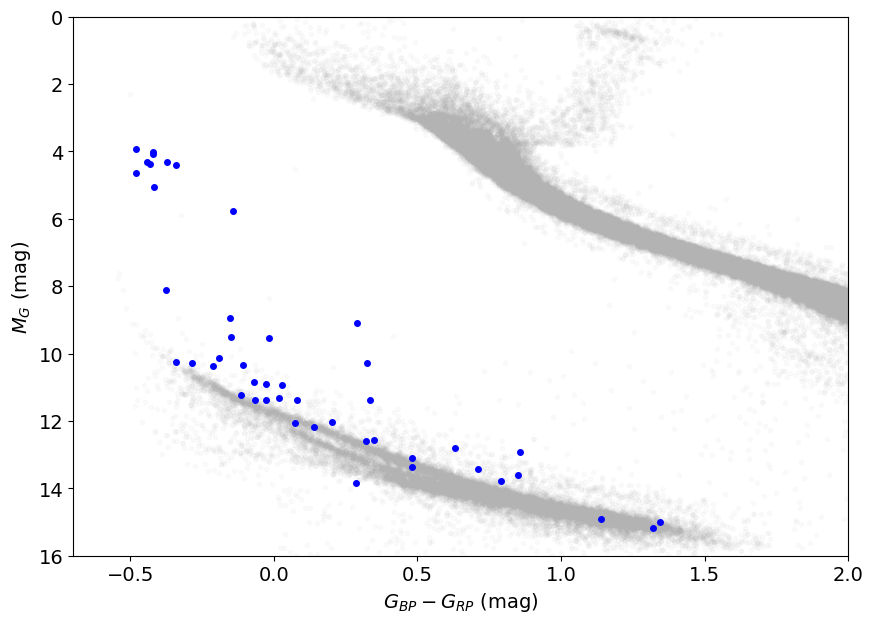

In [6]:
gmags_hvs = abs_mag(df_hvs['phot_g_mean_mag'], df_hvs['parallax'])
gmags_100pc = abs_mag(df_100pc['phot_g_mean_mag'], df_100pc['parallax'])

fig = plt.figure(figsize=(10,7))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_{G}$ (mag)')
plt.ylim(0,16)
plt.xlim(-0.7,2.0)
plt.gca().invert_yaxis()
plt.scatter(df_100pc['bp_rp'], gmags_100pc, marker='.', color='0.7', alpha=0.05)
plt.plot(df_hvs['bp_rp'], gmags_hvs, 'bo', markersize=4)
plt.show()

Compare la gráfica anterior con la Figura 1 de [Igoshev et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.518.6223I/abstract).  
Los objetos de Gaia DR3 dentro de 100 pc del sol se grafican en escala de grises como referencia, donde parte de la secuencia principal se ve entre $M_{G}\approx 0$ y $M_{G}\approx 9$, y parte de la secuencia de enanas blancas se ve entre $M_{G}\approx 10$ y $M_{G}\approx 16$.  
Las candidatas a WD HVS graficadas en azul pueden dividirse en tres grupos distintos:

1. Objetos tipo WD ubicados en o justo por encima de la secuencia de WD  
2. Objetos tipo subenana B caliente agrupados alrededor de $M_{G}\approx 4$ y $G_{BP}-G_{RP}\approx -0.4$  
3. Objetos ubicados entre la secuencia de WD y la secuencia principal  

Algunas subenanas O y B calientes han sido identificadas como fuentes hiperveloces (ver [Heber 2009](https://ui.adsabs.harvard.edu/abs/2009ARA%26A..47..211H/abstract) para una revisión y referencias).  
Además, hasta el 20% de las estrellas sdB residen en el halo de la Vía Láctea ([Napiwotzki 2008](https://myasp.astrosociety.org/product/CS392/vol-392-hot-subdwarf-stars-and-related-objects)), por lo que se espera que sus velocidades sean de cientos de km/s con respecto al sistema de referencia local (LSR) del disco delgado.  
Los autores clasifican a las candidatas con $4 \le M_{G} \le 6$ y $-0.5 \le G_{BP}-G_{RP} \le -0.25$ como HVsdBC, es decir, candidatas a sdB de alta velocidad.

<a class="anchor" id="galacto"></a>
## Distancias galactocéntricas y alturas sobre/debajo del plano galáctico para candidatas a WD HVS

Podemos usar la paralaje y las coordenadas galácticas de Gaia DR3 para calcular la posición galactocéntrica de cada candidata a WD HVS.  
La posición galactocéntrica en coordenadas cilíndricas tiene los siguientes tres componentes: la distancia galactocéntrica $R$, la acimut galactocéntrica $\phi$ (no usada en este notebook), y la distancia vertical $Z$.  
Las fórmulas de conversión son las siguientes ([López-Corredoira et al. 2000](https://ui.adsabs.harvard.edu/abs/2000MNRAS.313..392L/abstract)):

$r=\frac{1AU}{parallax}$  
$X(r,l,b) = R_{\odot} - r\cos l \cos b$  
$Y(r,l,b) = r \sin l \cos b$  
$Z(r,b) = r \sin b$  
$R(r,l,b) = \sqrt{X^{2}+Y^2}$  

Suponemos que el radio del sol es $R_{\odot}$ = 8.5 kpc.

$X$ y $Y$ son coordenadas cartesianas medidas en pársecs.  
$R$ y $Z$ son coordenadas cilíndricas en kpc.  
$l$ y $b$ representan la longitud y latitud galáctica en grados, respectivamente.  
$r$ es la distancia a la estrella en pársecs dada el paralaje en segundos de arco.

In [7]:
def galactocentric(parallax, l, b):
    "Calcular la distancia galactocéntrica y la distancia vertical."
    l = np.deg2rad(l)
    b = np.deg2rad(b)
    R_sun = 8.5
    r = 1/parallax
    X = R_sun - r*np.cos(l)*np.cos(b)
    Y = r*np.sin(l)*np.cos(b)
    Z = r*np.sin(b)
    R = np.sqrt(X**2 + Y**2)
    return R, Z

In [8]:
R, Z = galactocentric(df_hvs['parallax'], df_hvs['l'], df_hvs['b'])

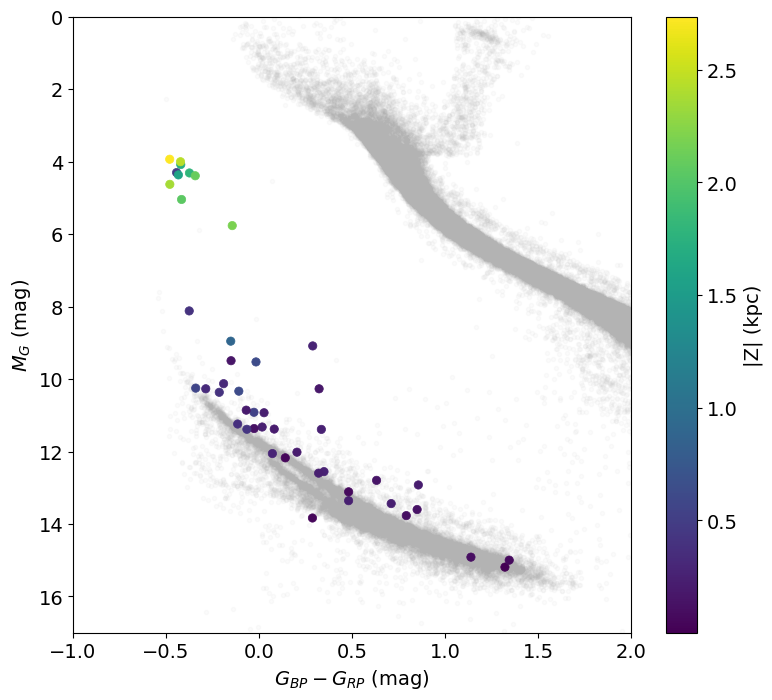

In [9]:
fig = plt.figure(figsize=(9,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_{G}$ (mag)')
plt.xlim(-1.0,2.0)
plt.ylim(0,17)
plt.gca().invert_yaxis()
plt.scatter(df_100pc['bp_rp'], gmags_100pc, marker='.', color='0.7', alpha=0.05)
plt.scatter(df_hvs['bp_rp'], gmags_hvs, c=[abs(Zs) for Zs in Z], linewidths=0.5)
cbar = plt.colorbar(label='|Z| (kpc)')

Compara la gráfica anterior con la Figura 3 de [Igoshev et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.518.6223I/abstract).  
Esta gráfica muestra la ubicación de las candidatas a WD HVS en el diagrama HR, coloreadas por la distancia vertical absoluta por encima/debajo del disco galáctico.  
Los objetos de Gaia DR3 dentro de 100 pc del Sol se grafican en escala de grises como referencia, donde parte de la secuencia principal se ve entre $M_{G}\approx 0$ y $M_{G}\approx 9$ y parte de la secuencia de enanas blancas se ve entre $M_{G}\approx 10$ y $M_{G}\approx 16$.  
Nótese que en su Figura 3, los autores usaron un método personalizado para desextinguir (deredden) sus candidatas a WD HVS. Nosotros decidimos no seguir ese mismo enfoque ya que las diferencias en los valores son diminutas. 

<a class="anchor" id="heights"></a>
## Alturas sobre el plano galáctico de las candidatas a WD HVS observadas

Con el fin de proporcionar potencialmente una estimación alternativa de edad para las candidatas cuyas edades por enfriamiento de WD y edades totales no pudieron estimarse porque sus masas eran menores de 0.5 masas solares (y por tanto no podrían formarse mediante la evolución normal de un único progenitor estelar en el tiempo de Hubble), los autores grafican las alturas de las WD HVS observadas por encima/debajo del disco galáctico.  
En [Casagrande et al. 2016](https://ui.adsabs.harvard.edu/abs/2016MNRAS.455..987C/abstract) se muestra que la mayoría de las estrellas que residen a menos de 1 kpc del plano galáctico son más jóvenes que la edad típica de 10 Gyr de las estrellas del halo.  
Podemos ver en la gráfica siguiente que la mayoría de nuestras candidatas a WD HVS se encuentran por debajo de 1 kpc (línea punteada roja) del plano, lo cual es consistente con un origen en el disco para la mayoría de la muestra y requeriría un impulso de velocidad (velocity kick) no trivial. Sin embargo, se necesita un estudio adicional de las velocidades radiales para acotar/mejor confirmar su origen.

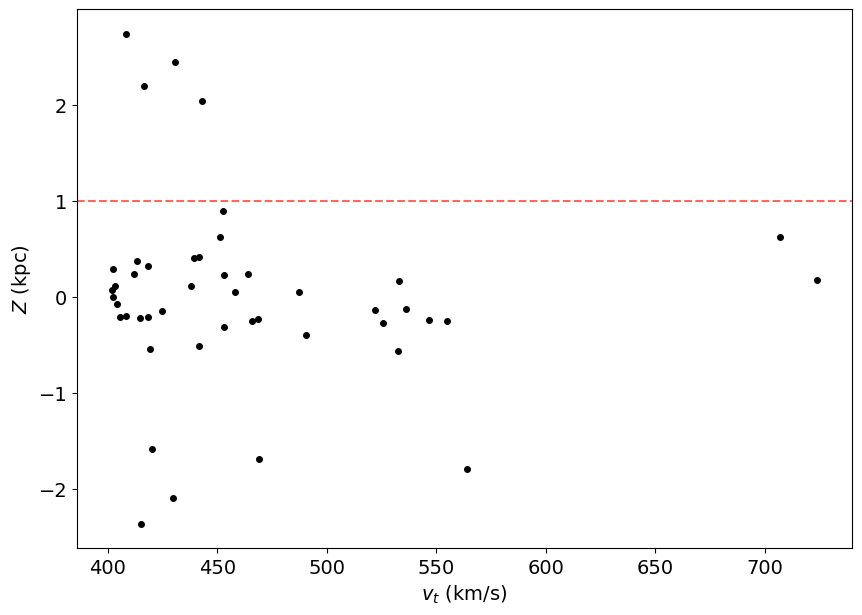

In [10]:
fig = plt.figure(figsize=(10,7))
plt.xlabel('$v_{t}$ (km/s)')
plt.ylabel('$Z$ (kpc)')
plt.plot(df_hvs['v'], Z, 'ko', markersize=4)
plt.axhline(y = 1, color = 'r', linestyle = '--', alpha=0.6)
plt.show()

Compara la gráfica anterior con la Figura 4 de [Igoshev et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.518.6223I/abstract).  
Esa figura muestra la distribución de las velocidades transversales y las distancias verticales por encima del plano galáctico para las candidatas a WD HVS.  
Las estrellas por debajo de la línea roja punteada se consideran más jóvenes que la edad de 10 Gyr de las estrellas del halo ([Casagrande et al. 2016](https://ui.adsabs.harvard.edu/abs/2016MNRAS.455..987C/abstract)) y pueden indicar un origen en el disco. 

<a class="anchor" id="ref"></a>
## Recursos y referencias

Casagrande et al. 2016, "Measuring the vertical age structure of the Galactic disc using asteroseismology and SAGA", MNRAS, 455, 987. https://doi.org/10.1093/mnras/stv2320

Gentile Fusillo, N. P. et al. 2021, "A catalogue of white dwarfs in Gaia EDR3", MNRAS, 508, 3877. https://doi.org/10.1093/mnras/stab2672

Heber 2009, "Hot Subdwarf Stars", ARA&A, 47, 211. https://www.annualreviews.org/doi/10.1146/annurev-astro-082708-101836

Igoshev et al. 2023, "Hyper-runaway and hypervelocity white dwarf candidates in Gaia Data Release 3: Possible remnants from Ia/Iax supernova explosions or dynamical encounters", MNRAS, 518, 6223. https://doi.org/10.1093/mnras/stac3488

López-Corredoira, M. et al. 2000, "Inversion of stellar statistics equation for the Galactic bulge", MNRAS, 313, 392. https://doi.org/10.1046/j.1365-8711.2000.03220.x

Napiwotzki R., 2008, in Heber U., Jeffery C. S., Napiwotzki R., eds, Astronomical Society of the Pacific Conference Series Vol. 392, Hot Subdwarf Stars and Related Objects. p. 139